Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные и посмотрим на них.

In [2]:
oo = pd.read_csv('olympics.csv', skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


# Task #L10.1


На какой дистанции Jesse Owens выйграл медаль?

In [3]:
oo[oo.Athlete == 'OWENS, Jesse']

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [4]:
'Ответ: Jesse Owens выигрывал медали на следующих дистанциях: ' + '; '.join(oo.Event[oo.Athlete == 'OWENS, Jesse'].values)

'Ответ: Jesse Owens выигрывал медали на следующих дистанциях: 100m; 200m; 4x100m relay; long jump'

# Task #L10.2
Используя groupby(), постройте график число всех медалей выйгранных накаждой олимпиаде.

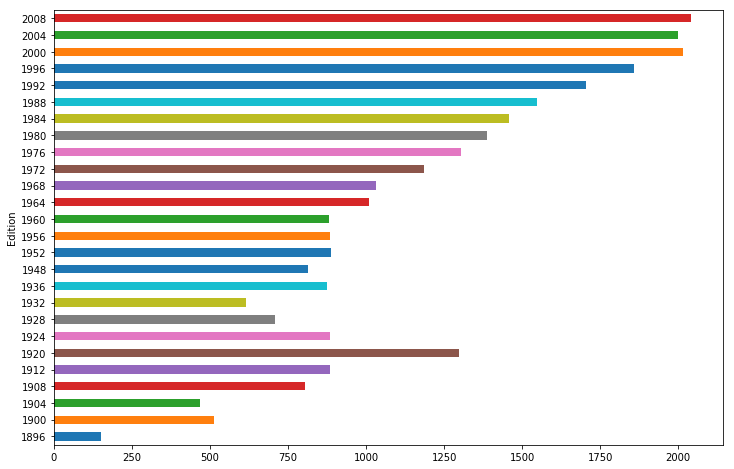

In [5]:
oo.groupby('Edition')['Edition'].size().plot(kind='barh', figsize=(12, 8))

# Task #L10.3

Постройте график 5 атлетов которые выйграли большинство золотых медалей.

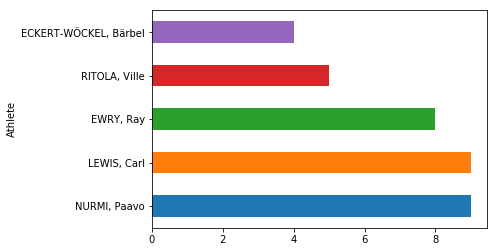

In [6]:
oo[(oo.Medal == 'Gold') & (oo.Discipline == 'Athletics')].groupby('Athlete').size().sort_values(ascending=False)[:5].plot(kind='barh')

# HW 10.1


Необходимо построить таблицу, в которой по всем годам олимпиады должны отображаться топовые атлеты США по общему количеству медалей.


Если несколько атлетов набрали максимальное количество медалей, выводятся все такие атлеты.
Если атлет завоевал в каком-то году медали в нескольких дисциплинах, его дисциплины перечисляются через запятую.


In [7]:
# define functions to calculate amount of different medals
func_bronze = lambda x: sum(x == 'Bronze')
func_gold = lambda x: sum(x == 'Gold')
func_silver = lambda x: sum(x == 'Silver')

# define dicts to use them in groupby
dict_medal = {"Gold": func_gold, "Silver": func_silver, "Bronze": func_bronze, "Total": 'count'}
dict_discipline = {"": lambda x: ', '.join(set(x))}

# calculate medals for every athlet in every edition and select all disciplines of athlets
oo1 = oo[oo.NOC == 'USA'].groupby(['Edition', 'Athlete'], as_index=False).agg({'Discipline': dict_discipline, 'Medal':dict_medal})

# within each Edition sort values by Total medal count
oo1 = oo1.sort_values(['Edition', ('Medal', 'Total')], ascending=False)

# for each Edition select top. Lenght of top depends on Edition.
oo1 = oo1.groupby(['Edition']).apply(lambda x: x.head(sum(x.Medal.Total==max(x.Medal.Total))))
# select columns we need
oo1 = oo1[['Athlete', 'Discipline', 'Medal']]
# make columns look beautifull
oo1 = oo1.reset_index()
del oo1['level_1']
oo1.columns = ['Edition', 'Athlete', 'Discipline', 'Gold', 'Silver', 'Bronze', 'Total']
oo1

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Edition,Athlete,Discipline,Gold,Silver,Bronze,Total
0,1896,"GARRETT, Robert",Athletics,2,2,0,4
1,1900,"BAXTER, Irving",Athletics,2,3,0,5
2,1900,"TEWKSBURY, Walter B. John",Athletics,2,2,1,5
3,1904,"DOWNING, Burton",Cycling Track,2,3,1,6
4,1904,"EYSER, George",Artistic G.,3,2,1,6
5,1904,"HEIDA, Anton",Artistic G.,5,1,0,6
6,1908,"SHEPPARD, Melvin",Athletics,3,0,0,3
7,1908,"SHERIDAN, Martin",Athletics,2,0,1,3
8,1912,"OSBURN, Carl Townsend",Shooting,1,2,1,4
9,1920,"LEE, Willis",Shooting,5,1,1,7
